<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Plotly analysis for  Dashboard**


In [91]:
import wget
import pandas as pd

In [92]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
df=pd.read_csv(spacex_csv_file)
df.head(1)

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0


In [93]:
# Group the DataFrame by Launch Site and Class, then count the occurrences
site_outcomes = df.groupby(['Launch Site', 'class']).size().unstack(fill_value=0)

# Rename the columns for better clarity
site_outcomes.columns = ['Failure', 'Success']

# Add a column for the total number of launches
site_outcomes['Total'] = site_outcomes['Failure'] + site_outcomes['Success']

# Find the launch site with the highest success rate
highest_success_rate_site = site_outcomes[site_outcomes['Total'] > 0].idxmax()['Success']

# Find the launch site with the lowest success rate
lowest_success_rate_site = site_outcomes[site_outcomes['Total'] > 0].idxmin()['Success']

# Display the outcomes for each launch site
print("Success and Failure of Each Launch Site:")
print(site_outcomes)

# Display the launch site with the highest success rate
print("\nLaunch Site with the Highest Success Rate:")
print(highest_success_rate_site)

# Display the launch site with the lowest success rate
print("\nLaunch Site with the Lowest Success Rate:")
print(lowest_success_rate_site)


Success and Failure of Each Launch Site:
              Failure  Success  Total
Launch Site                          
CCAFS LC-40        19        7     26
CCAFS SLC-40        4        3      7
KSC LC-39A          3       10     13
VAFB SLC-4E         6        4     10

Launch Site with the Highest Success Rate:
KSC LC-39A

Launch Site with the Lowest Success Rate:
CCAFS SLC-40


In [94]:
# 1. Which site has the largest successful launches?
largest_successful_site = site_outcomes['Success'].idxmax()

# 2. Which site has the highest launch success rate?
site_outcomes['Success Rate'] = site_outcomes['Success'] / site_outcomes['Total']
highest_success_rate_site = site_outcomes['Success Rate'].idxmax()

# 3. Which payload range(s) has the highest launch success rate?
payload_ranges = df['Payload Mass (kg)'].apply(lambda x: f'{int(x/100)*100}-{int(x/100)*100 + 99}')
payload_outcomes = df.groupby([payload_ranges, 'class']).size().unstack(fill_value=0)
payload_outcomes.columns = ['Failure', 'Success']
payload_outcomes['Success Rate'] = payload_outcomes['Success'] / (payload_outcomes['Success'] + payload_outcomes['Failure'])
highest_success_rate_payload_range = payload_outcomes['Success Rate'].idxmax()

# 4. Which payload range(s) has the lowest launch success rate?
lowest_success_rate_payload_range = payload_outcomes['Success Rate'].idxmin()

# 5. Which F9 Booster version has the highest launch success rate?
booster_outcomes = df.groupby(['Booster Version', 'class']).size().unstack(fill_value=0)
booster_outcomes.columns = ['Failure', 'Success']
booster_outcomes['Success Rate'] = booster_outcomes['Success'] / (booster_outcomes['Success'] + booster_outcomes['Failure'])
highest_success_rate_booster_version = booster_outcomes['Success Rate'].idxmax()


# 1. Which site has the largest successful launches?
print("Site with the largest successful launches:", largest_successful_site)

# 2. Which site has the highest launch success rate?
print("Site with the highest launch success rate:", highest_success_rate_site)

# 3. Which payload range(s) has the highest launch success rate?
print("Payload range(s) with the highest launch success rate:", highest_success_rate_payload_range)

# 4. Which payload range(s) has the lowest launch success rate?
print("Payload range(s) with the lowest launch success rate:", lowest_success_rate_payload_range)

# 5. Which F9 Booster version has the highest launch success rate?
print("F9 Booster version with the highest launch success rate:", highest_success_rate_booster_version)
# Booster name for Payload range(s) with the lowest launch success rate
print("Booster name for Payload range(s) with the lowest launch success rate: ", 
      df[(df['Payload Mass (kg)'] >= 0) & (df['Payload Mass (kg)'] <= 99)]['Booster Version'].unique())



Site with the largest successful launches: KSC LC-39A
Site with the highest launch success rate: KSC LC-39A
Payload range(s) with the highest launch success rate: 1900-1999
Payload range(s) with the lowest launch success rate: 0-99
F9 Booster version with the highest launch success rate: F9 B4 B1039.1
Booster name for Payload range(s) with the lowest launch success rate:  ['F9 v1.0  B0003' 'F9 v1.0  B0004']


In [95]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Relation between Booster Version and Launch Outcome
# Create a contingency table
contingency_table_booster = pd.crosstab(df['Booster Version'], df['class'])

# Perform chi-square test
chi2_booster, p_booster, _, _ = chi2_contingency(contingency_table_booster)

# Determine if there is a significant association
significant_association_booster = p_booster < 0.05

# 2. Relation between Launch Site and Launch Outcome
# Create another contingency table
contingency_table_site = pd.crosstab(df['Launch Site'], df['class'])

# Perform chi-square test
chi2_site, p_site, _, _ = chi2_contingency(contingency_table_site)

# Determine if there is a significant association
significant_association_site = p_site < 0.05

# 3. Relation between Payload Mass and Launch Outcome
# Create a third contingency table
contingency_table_payload = pd.crosstab(df['Payload Mass (kg)'], df['class'])

# Perform chi-square test
chi2_payload, p_payload, _, _ = chi2_contingency(contingency_table_payload)

 #Determine if there is a significant association
significant_association_payload = p_payload < 0.05

# Print the results
print("Significant association between Booster Version and Launch Outcome:", significant_association_booster)
print("Significant association between Launch Site and Launch Outcome:", significant_association_site)
print("Significant association between Payload Mass and Launch Outcome:", significant_association_payload)




Significant association between Booster Version and Launch Outcome: False
Significant association between Launch Site and Launch Outcome: True
Significant association between Payload Mass and Launch Outcome: False


In [96]:
# Encode Launch Outcome (0 for failure, 1 for success)
df['Outcome'] = df['class'].map({0: 0, 1: 1})

# Calculate the correlation coefficient
correlation = df['Payload Mass (kg)'].corr(df['Outcome'])

# Determine the impact of the correlation
if correlation > 0:
    impact = "positive"
elif correlation < 0:
    impact = "negative"
else:
    impact = "no"

# Print the correlation coefficient and its impact
print("Correlation coefficient between Payload Mass and Launch Outcome:", correlation)
print("Impact of the correlation:", impact)





Correlation coefficient between Payload Mass and Launch Outcome: 0.1000499056293926
Impact of the correlation: positive


In [97]:
# Calculate correlation coefficients and test significance for Booster Version and Launch Outcome
chi2_booster, p_booster = chi2_contingency(contingency_table_booster)[0:2]
correlation_booster = contingency_table_booster / contingency_table_booster.sum().sum()
correlation_significant_booster = p_booster < 0.05

# Calculate correlation coefficients and test significance for Launch Site and Launch Outcome
chi2_site, p_site = chi2_contingency(contingency_table_site)[0:2]
correlation_site = contingency_table_site / contingency_table_site.sum().sum()
correlation_significant_site = p_site < 0.05

# Print the results
print("Correlation coefficient between Booster Version and Launch Outcome:", correlation_booster)
print("Significant association between Booster Version and Launch Outcome:", correlation_significant_booster)

print("Correlation coefficient between Launch Site and Launch Outcome:", correlation_site)
print("Significant association between Launch Site and Launch Outcome:", correlation_significant_site)


Correlation coefficient between Booster Version and Launch Outcome: class                   0         1
Booster Version                    
F9 B4  B1039.2   0.017857  0.000000
F9 B4  B1040.2   0.017857  0.000000
F9 B4  B1041.2   0.017857  0.000000
F9 B4  B1043.2   0.017857  0.000000
F9 B4 B1039.1    0.000000  0.017857
F9 B4 B1040.1    0.000000  0.017857
F9 B4 B1041.1    0.000000  0.017857
F9 B4 B1042.1    0.000000  0.017857
F9 B4 B1043.1    0.000000  0.017857
F9 B4 B1044      0.017857  0.000000
F9 B4 B1045.1    0.000000  0.017857
F9 B5  B1046.1   0.000000  0.017857
F9 FT  B1021.2   0.000000  0.017857
F9 FT  B1029.2   0.000000  0.017857
F9 FT  B1031.2   0.000000  0.017857
F9 FT  B1032.2   0.017857  0.000000
F9 FT  B1035.2   0.000000  0.017857
F9 FT  B1036.2   0.017857  0.000000
F9 FT  B1038.2   0.017857  0.000000
F9 FT B1019      0.000000  0.017857
F9 FT B1020      0.017857  0.000000
F9 FT B1021.1    0.000000  0.017857
F9 FT B1022      0.000000  0.017857
F9 FT B1023.1    0.000000  0.017

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
# Assuming df is the DataFrame containing the relevant data

# Statistical Analysis

# 1. Calculate correlation coefficient between Payload Mass and Launch Outcome
correlation = df['Payload Mass (kg)'].corr(df['class'])

# 2. Perform chi-square test for association between Launch Outcome and Booster Version Category
contingency_table = pd.crosstab(df['class'], df['Booster Version Category'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Interpretation
print("Correlation coefficient between Payload Mass and Launch Outcome:", correlation)
print("Chi-square test statistic for Launch Outcome and Booster Version Category:", chi2_stat)
print("p-value for significance of association:", p_val)


Correlation coefficient between Payload Mass and Launch Outcome: 0.1000499056293926
Chi-square test statistic for Launch Outcome and Booster Version Category: 19.274747474747475
p-value for significance of association: 0.0006940267086429005


In [99]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Filter the DataFrame for the Payload Range (0K – 5K)
filtered_df = df[(df['Payload Mass (kg)'] >= 0) & (df['Payload Mass (kg)'] <= 5000)]

# Calculate the correlation coefficient
correlation = filtered_df['Payload Mass (kg)'].corr(filtered_df['class'])

print("Correlation coefficient between Payload Range (0K – 5K) and Launch Outcome:", correlation)


Correlation coefficient between Payload Range (0K – 5K) and Launch Outcome: 0.26465348293763236


In [100]:
# Filter the DataFrame for payload range (5K – 10K)
payload_range_5K_10K = df[(df['Payload Mass (kg)'] >= 5000) & (df['Payload Mass (kg)'] <= 10000)]

# Calculate the correlation coefficient between the filtered payload mass and launch outcome
correlation_coefficient_5K_10K = payload_range_5K_10K['Payload Mass (kg)'].corr(payload_range_5K_10K['class'])

print("Correlation coefficient between Payload Range (5K – 10K) and Launch Outcome:", correlation_coefficient_5K_10K)


Correlation coefficient between Payload Range (5K – 10K) and Launch Outcome: 0.2812089636667523


In [101]:
# Filter the DataFrame for payload range (0K - 5K) and (5K - 10K)
payload_range_0_5k = df[df['Payload Mass (kg)'].between(0, 5000)]
payload_range_5_10k = df[df['Payload Mass (kg)'].between(5000, 10000)]

# Concatenate the filtered DataFrames
payload_range_combined = pd.concat([payload_range_0_5k, payload_range_5_10k])

# Calculate correlation coefficient
correlation_payload_range = payload_range_combined['Payload Mass (kg)'].corr(payload_range_combined['class'])
print("Correlation coefficient between overall Payload Range and Launch Outcome:", correlation_payload_range)


Correlation coefficient between overall Payload Range and Launch Outcome: 0.10004990562939266


In [102]:
import pandas as pd

# Assuming df contains the data with columns 'Payload Mass (kg)' and 'Class' (success or failure)
# Define payload weight categories
payload_categories = pd.cut(df['Payload Mass (kg)'], bins=[0, 1000, 2000, 3000, 4000, 5000, float('inf')])

# Calculate success rate for each payload weight category
success_rates = df.groupby(payload_categories)['class'].mean()

# Print success rates
print("Success Rates for Different Payload Weight Categories:")
print(success_rates)

# Analyze correlation (e.g., using correlation coefficient)
correlation_coefficient = success_rates.corr(pd.Series(success_rates.index.codes, index=success_rates.index))
print("\nCorrelation Coefficient between Payload Weight Categories and Success Rate:", correlation_coefficient)


Success Rates for Different Payload Weight Categories:
Payload Mass (kg)
(0.0, 1000.0]       0.250000
(1000.0, 2000.0]    0.333333
(2000.0, 3000.0]    0.500000
(3000.0, 4000.0]    0.727273
(4000.0, 5000.0]    0.375000
(5000.0, inf]       0.357143
Name: class, dtype: float64

Correlation Coefficient between Payload Weight Categories and Success Rate: 0.2805507039397141


In [103]:
# Total number of successes
total_successes = df['class'].sum()

# Total number of failures
total_failures = len(df) - total_successes

print("Total Successes:", total_successes)
print("Total Failures:", total_failures)


Total Successes: 24
Total Failures: 32


In [104]:
# Group the DataFrame by Payload Mass and Class, then count the occurrences
payload_outcomes = df.groupby(['Payload Mass (kg)', 'class']).size().unstack(fill_value=0)

# Rename the columns for better clarity
payload_outcomes.columns = ['Failure', 'Success']

# Add a column for the total number of launches
payload_outcomes['Total'] = payload_outcomes['Failure'] + payload_outcomes['Success']

# Print the DataFrame
print(payload_outcomes)


                   Failure  Success  Total
Payload Mass (kg)                         
0.00                     2        0      2
362.00                   0        1      1
475.00                   0        1      1
500.00                   2        0      2
525.00                   1        0      1
553.00                   1        0      1
570.00                   1        0      1
677.00                   1        0      1
1316.00                  1        0      1
1898.00                  1        0      1
1952.00                  0        1      1
2034.00                  0        1      1
2150.00                  1        0      1
2205.00                  0        1      1
2216.00                  1        0      1
2257.00                  0        1      1
2296.00                  1        0      1
2395.00                  1        0      1
2490.00                  0        1      1
2647.00                  1        0      1
2708.00                  0        1      1
3100.00    

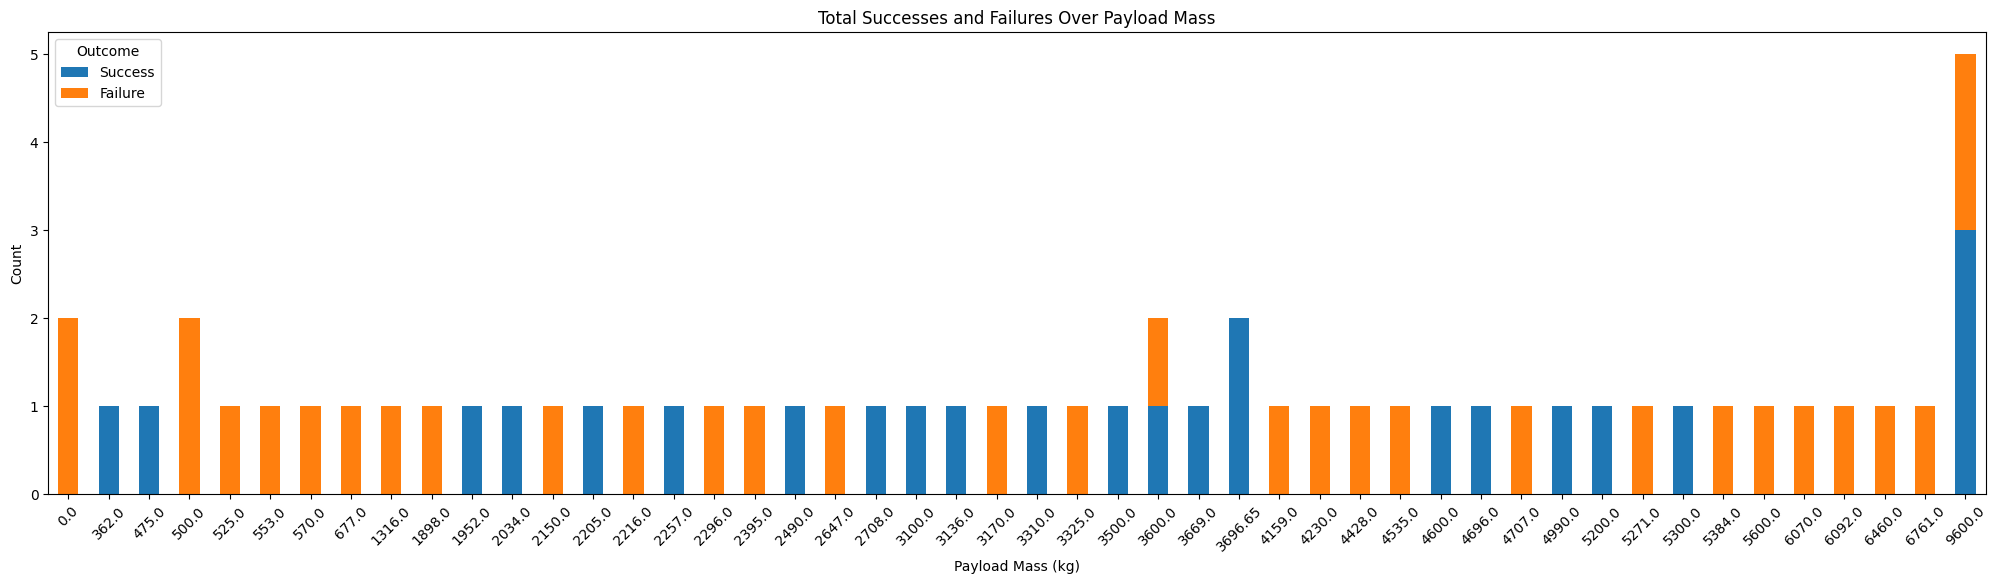

In [105]:
import matplotlib.pyplot as plt

# Plotting
payload_outcomes[['Success', 'Failure']].plot(kind='bar', stacked=True, figsize=(25, 6))

# Adding labels and title
plt.title('Total Successes and Failures Over Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome')

# Show the plot
plt.show()


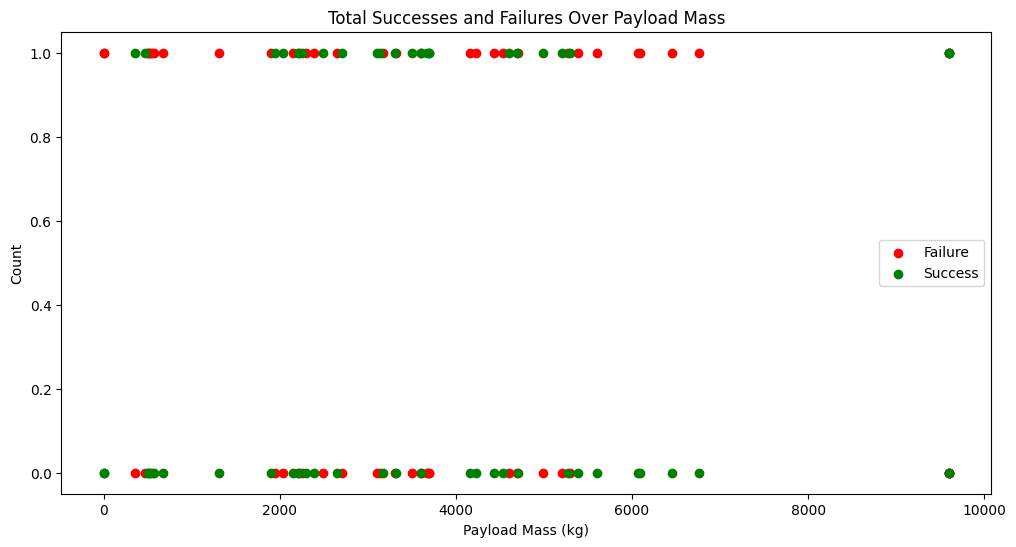

In [106]:
import matplotlib.pyplot as plt

# Group the DataFrame by Booster Version and Payload Mass, then count the occurrences of success and failure
booster_payload_outcomes = df.groupby(['Booster Version', 'Payload Mass (kg)', 'class']).size().unstack(fill_value=0)

# Reset the index to have Booster Version and Payload Mass as columns
booster_payload_outcomes = booster_payload_outcomes.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(booster_payload_outcomes['Payload Mass (kg)'], booster_payload_outcomes[0], label='Failure', color='red')
plt.scatter(booster_payload_outcomes['Payload Mass (kg)'], booster_payload_outcomes[1], label='Success', color='green')

# Adding labels and title
plt.title('Total Successes and Failures Over Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


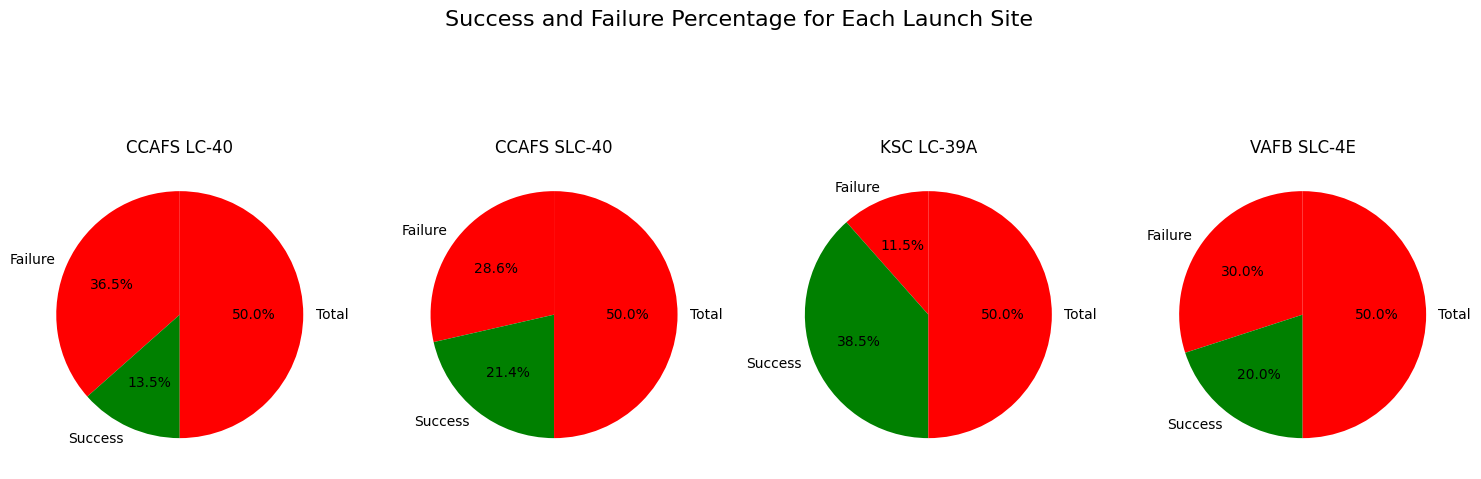

In [107]:
import matplotlib.pyplot as plt

# Group the DataFrame by Launch Site and Class, then count the occurrences
site_outcomes = df.groupby(['Launch Site', 'class']).size().unstack(fill_value=0)

# Rename the columns for better clarity
site_outcomes.columns = ['Failure', 'Success']

# Add a column for the total number of launches
site_outcomes['Total'] = site_outcomes['Failure'] + site_outcomes['Success']

# Plot the pie chart for each launch site
fig, axs = plt.subplots(nrows=1, ncols=len(site_outcomes), figsize=(15, 6))

for i, (launch_site, outcomes) in enumerate(site_outcomes.iterrows()):
    axs[i].pie(outcomes, labels=outcomes.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    axs[i].set_title(launch_site)

# Add a title to the entire plot
plt.suptitle('Success and Failure Percentage for Each Launch Site', fontsize=16)
plt.tight_layout()
plt.show()


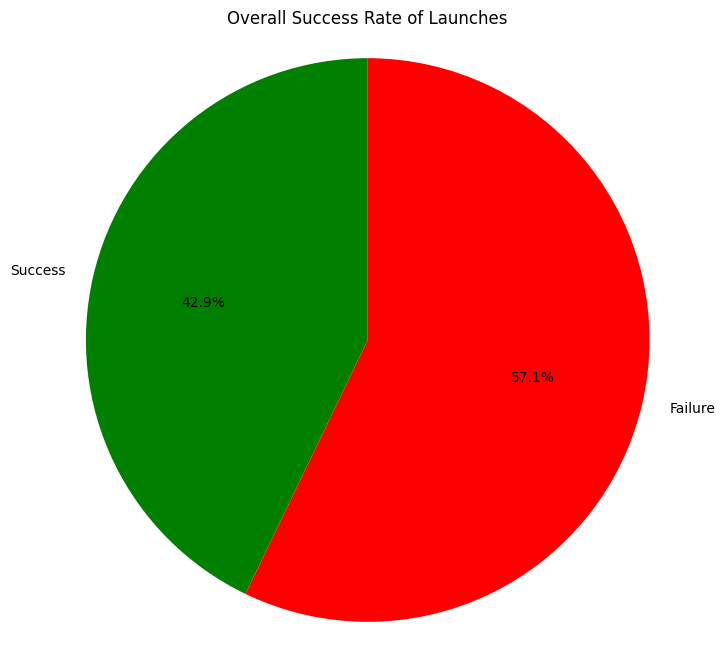

In [108]:
import matplotlib.pyplot as plt

# Calculate the total number of successful launches
total_success = df[df['class'] == 1]['class'].count()

# Plot the pie chart for successful launches
plt.figure(figsize=(8, 8))
plt.pie([total_success, len(df) - total_success], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Overall Success Rate of Launches')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [109]:
success_df = df[df['class'] == 1].groupby('Launch Site').size().reset_index(name='Success Count')


In [110]:
success_df.head(1)

,Launch Site,Success Count
0,CCAFS LC-40,7


In [113]:
# Create a pie chart with Plotly
pie_chart = px.pie(
    data_frame=success_df,
    names="Launch Site",
    values='Success Count',
    title="Total Successful Launches for All Sites",
    color_discrete_sequence=px.colors.qualitative.G10,  # Custom color palette
    hole=0.5,  # Size of the hole in the center
    labels={"Launch Site": "LaunchSite", "Success Count": "Success rate"},  # Custom labels
  
)

# Adjust layout
pie_chart.update_layout(
    margin=dict(t=60, b=10, l=10, r=10),  # Adjust margin to provide more space
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),  # Position legend
    font=dict(size=12),  # Adjust font size
)

# Show the pie chart
pie_chart.show()


In [125]:
import plotly.express as px

# Filter dataframe for only 'Success' and 'Failure' categories
filtered_df = df[df['class'].isin([0, 1])]

# Plot scatter plot with Plotly Express
scatter_plot = px.scatter(
    data_frame=filtered_df,
    x='Payload Mass (kg)',
    y='class',
    color='Booster Version Category',
    size='Payload Mass (kg)',  # Map circle size to payload mass
    color_discrete_sequence=px.colors.qualitative.G10,  # Custom color palette
    title='Correlation Between Payload and Success for all Sites',
    labels={'class': 'Outcome', 'Payload Mass (kg)': 'Payload Mass (kg)'},
)

# Show the plot
scatter_plot.show()
